<a href="https://colab.research.google.com/github/canerborekci/PySpark_CSV_Examples/blob/main/BuyukVeriCanerBorekci2016469014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***APACHE SPARKI COLAB ORTAMINA KURMA***

Colab ortamında çalışmak için gerekli işlemleri yapıyoruz

In [11]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q ftp://ftp.itu.edu.tr/Mirror/Apache/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [12]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"

In [13]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

# ***CSV Dosyasını Yükleme***

CSV dosyamızı tanıtmak için Colab'ın files kütüphanesini import ediyoruz ve csv dosyasını cihazdan upload ediyoruz.

In [14]:
from google.colab import files

In [25]:
uploaded = files.upload()  

Saving turkey_car_market.csv to turkey_car_market.csv


Dataset adında bir dataframe oluşturup bu değişkene Sparka okuttuğum CSV dosyasının değerlerini atıyorum. 
Header=True yapmamın amacı ilk satırı tablonun değişkenleri değil tablonun bir değeri olarak alması.

In [44]:
dataset=spark.read.csv("turkey_car_market.csv",header=True)

# ***VERİ ÖNİŞLEME***

In [107]:
dataset.show()

+-----------+------+--------------+-------------------+---------+----------+-------------------+---------------+--------------+-----------+----------------+----------+-----+------+------+
|İlan Tarihi| Marka|Arac Tip Grubu|           Arac Tip|Model Yıl|Yakıt Turu|              Vites|            CCM|   Beygir Gucu|       Renk|       Kasa Tipi|    Kimden|Durum|    Km| Fiyat|
+-----------+------+--------------+-------------------+---------+----------+-------------------+---------------+--------------+-----------+----------------+----------+-----+------+------+
| 27/05/2020|Jaguar|            XF|2.0 D Prestige Plus|   2017.0|     Dizel|     Otomatik Vites|   1801-2000 cc|    176-200 BG|  Lacivert |Hatchback 5 Kapı| Galeriden|2. El| 26100|634500|
| 16/06/2020| Acura|            CL|                  -|   2015.0|     Dizel|Yarı Otomatik Vites|   1301-1600 cc|    101-125 BG|      Mavi |           Sedan|Sahibinden|2. El|127000|151500|
| 14/06/2020| Acura|            CL|                2.2|   19

In [46]:
dataset.printSchema()

root
 |-- İlan Tarihi: string (nullable = true)
 |-- Marka: string (nullable = true)
 |-- Arac Tip Grubu: string (nullable = true)
 |-- Arac Tip: string (nullable = true)
 |-- Model Yıl: string (nullable = true)
 |-- Yakıt Turu: string (nullable = true)
 |-- Vites: string (nullable = true)
 |-- CCM: string (nullable = true)
 |-- Beygir Gucu: string (nullable = true)
 |-- Renk: string (nullable = true)
 |-- Kasa Tipi: string (nullable = true)
 |-- Kimden: string (nullable = true)
 |-- Durum: string (nullable = true)
 |-- Km: string (nullable = true)
 |-- Fiyat: string (nullable = true)



Verilerle işlem yapacağım için daha sonrasında ilk oluşturduğum dataset dataframe'i ile karşılaştırma yapma ihtimalime karşın dataset2 adında bir dataframe değer olarak atıyorum csv dosyasını.

Sql sorguları yapabilmek adına kolon isimlerindeki boşlukları sql sorguları algılayamayacağı için schema özelliği kullanılarak kolon isimleri ve data tiplerini düzenliyorum.

In [146]:
from pyspark.sql.types import *

In [147]:
Schema = StructType([ StructField("ilantarihi", StringType(), True),
                      StructField("marka", StringType(), True),
                      StructField("aractipgrup", StringType(), True),
                      StructField("aractip", StringType(), True),
                      StructField("modelyil", DoubleType(), True),
                      StructField("yakitturu", StringType(), True),
                     StructField("vites", StringType(), True),
                     StructField("ccm", StringType(), True),
                     StructField("beygir_gucu", StringType(), True),
                     StructField("renk", StringType(), True),
                     StructField("kasa_tipi", StringType(), True),
                     StructField("kimden", StringType(), True),
                     StructField("durum", StringType(), True),
                     StructField("km", IntegerType(), True),
                     StructField("fiyat", IntegerType(), True),
                    ])

In [148]:
dataset2=spark.read.csv("turkey_car_market.csv",header=True, schema=Schema)

Artık kolon isimleri ve data tipleri belirlediğimiz gibi.

In [149]:
dataset2.show()

+----------+------+-----------+-------------------+--------+----------+-------------------+---------------+--------------+-----------+----------------+----------+-----+------+------+
|ilantarihi| marka|aractipgrup|            aractip|modelyil| yakitturu|              vites|            ccm|   beygir_gucu|       renk|       kasa_tipi|    kimden|durum|    km| fiyat|
+----------+------+-----------+-------------------+--------+----------+-------------------+---------------+--------------+-----------+----------------+----------+-----+------+------+
|27/05/2020|Jaguar|         XF|2.0 D Prestige Plus|  2017.0|     Dizel|     Otomatik Vites|   1801-2000 cc|    176-200 BG|  Lacivert |Hatchback 5 Kapı| Galeriden|2. El| 26100|634500|
|16/06/2020| Acura|         CL|                  -|  2015.0|     Dizel|Yarı Otomatik Vites|   1301-1600 cc|    101-125 BG|      Mavi |           Sedan|Sahibinden|2. El|127000|151500|
|14/06/2020| Acura|         CL|                2.2|  1994.0|Benzin/LPG|          Düz 

In [150]:
dataset2.printSchema()

root
 |-- ilantarihi: string (nullable = true)
 |-- marka: string (nullable = true)
 |-- aractipgrup: string (nullable = true)
 |-- aractip: string (nullable = true)
 |-- modelyil: double (nullable = true)
 |-- yakitturu: string (nullable = true)
 |-- vites: string (nullable = true)
 |-- ccm: string (nullable = true)
 |-- beygir_gucu: string (nullable = true)
 |-- renk: string (nullable = true)
 |-- kasa_tipi: string (nullable = true)
 |-- kimden: string (nullable = true)
 |-- durum: string (nullable = true)
 |-- km: integer (nullable = true)
 |-- fiyat: integer (nullable = true)



SQL sorguları yapabilmek için dataset2 de olan değeri car adında bi ilişkisel veri tabanı tablosuna dönüşütürdük. Artık sql sorgularını yapabiliriz.

In [151]:
dataset2.createOrReplaceTempView("car")


In [152]:
sorgu=spark.sql("select * from car")

In [153]:
sorgu.show()

+----------+------+-----------+-------------------+--------+----------+-------------------+---------------+--------------+-----------+----------------+----------+-----+------+------+
|ilantarihi| marka|aractipgrup|            aractip|modelyil| yakitturu|              vites|            ccm|   beygir_gucu|       renk|       kasa_tipi|    kimden|durum|    km| fiyat|
+----------+------+-----------+-------------------+--------+----------+-------------------+---------------+--------------+-----------+----------------+----------+-----+------+------+
|27/05/2020|Jaguar|         XF|2.0 D Prestige Plus|  2017.0|     Dizel|     Otomatik Vites|   1801-2000 cc|    176-200 BG|  Lacivert |Hatchback 5 Kapı| Galeriden|2. El| 26100|634500|
|16/06/2020| Acura|         CL|                  -|  2015.0|     Dizel|Yarı Otomatik Vites|   1301-1600 cc|    101-125 BG|      Mavi |           Sedan|Sahibinden|2. El|127000|151500|
|14/06/2020| Acura|         CL|                2.2|  1994.0|Benzin/LPG|          Düz 

Şimdi kolon kolon kaç farklı data girilmiş inceleyeceğiz, ilanlar girilirken bazı değerleri girilmeyen ilanları datasetimizden çıkaracağız.

Markalarda null isminde bir data girilmiş. Aslında girilmeyen bir veri anlamında null ancak drop.na yaptığımda algılamadığı için bir veri olarak datasette yer ettiğini düşünüyorum.

In [158]:
markalar=spark.sql("select distinct marka from car")
markalar.count()

37

In [159]:
markalar.show()

+----------+
|     marka|
+----------+
|Volkswagen|
|  Infiniti|
|   Peugeot|
|    Jaguar|
|  Maserati|
|     Rover|
|      Jeep|
|Mitsubishi|
|       Kia|
|      Mini|
|      null|
| Chevrolet|
|   Hyundai|
|     Honda|
|     Tofaş|
|      Audi|
|      Seat|
|     Isuzu|
|  Mercedes|
|Land Rover|
+----------+
only showing top 20 rows



AraçTip kolonunda '-' değeri girilen değerler görüyoruz bunların sayısına bakıyorum. daha sonrasında bu değeri içeren araçları kaldıracağız.

In [162]:
aractip=spark.sql("select * from car where aractip='-'")
aractip.count()


55

Yakıt Türlerinde de null değeri var.

In [163]:
yakitturu=spark.sql("select distinct yakitturu from car")
yakitturu.show()

+----------+
| yakitturu|
+----------+
|      null|
|Benzin/LPG|
|    Benzin|
|    Hibrit|
|  Elektrik|
|     Dizel|
+----------+



In [164]:
vites=spark.sql("select distinct vites from car")
vites.show()

+-------------------+
|              vites|
+-------------------+
|          Düz Vites|
|               null|
|Yarı Otomatik Vites|
|     Otomatik Vites|
+-------------------+



ccm kolonunda istenemeyen null ve '-' değeri var.

In [165]:
ccm=spark.sql("select distinct ccm from car")
ccm.show()

+----------------+
|             ccm|
+----------------+
|    1801-2000 cc|
|    2001-2500 cc|
|            null|
|    1301-1600 cc|
|    4001-4500 cc|
| 1300 cc ve altı|
|    5501-6000 cc|
|               -|
|    4501-5000 cc|
|    1601-1800 cc|
|      Bilmiyorum|
|    5001-5500 cc|
|6001 cc ve üzeri|
|    3501-4000 cc|
|    3001-3500 cc|
|    2501-3000 cc|
+----------------+



In [166]:
beygir_gucu=spark.sql("select distinct beygir_gucu from car")
beygir_gucu.show()

+---------------+
|    beygir_gucu|
+---------------+
|     201-225 BG|
|       51-75 BG|
|           null|
| 100 BG ve altı|
|     451-475 BG|
|     176-200 BG|
|     376-400 BG|
|     276-300 BG|
|     326-350 BG|
|              -|
|     101-125 BG|
|     251-275 BG|
|     Bilmiyorum|
|     301-325 BG|
|     151-175 BG|
|     126-150 BG|
|  50 BG ve altı|
|      76-100 BG|
|     226-250 BG|
|601 BG ve üzeri|
+---------------+



In [167]:
renk=spark.sql("select distinct renk from car")
renk.show()

+-----------+
|       renk|
+-----------+
|       Bej |
|   Amarant |
|Zeytin Gri |
| Gümüş Gri |
|     Diğer |
|     Gümüş |
|      Füme |
|   Ihlamur |
|     Bordo |
|     Pembe |
|       null|
| Kum Rengi |
|  Lacivert |
|     Yeşil |
|Kahverengi |
|   Eflatun |
|     Altın |
| Bal Rengi |
|   Turuncu |
|       Mor |
+-----------+
only showing top 20 rows



In [168]:
kasa_tipi=spark.sql("select distinct kasa_tipi from car")
kasa_tipi.show()

+--------------------+
|           kasa_tipi|
+--------------------+
|       Station Wagon|
|           Crossover|
|                 MPV|
|                null|
|               Sedan|
|            Roadster|
|         Arazi Aracı|
|               Diğer|
|Üstü Açık / Cabri...|
|           Camlı Van|
|    Hatchback 5 Kapı|
|        Spor / Coupe|
|             Minivan|
|    Hatchback 3 Kapı|
+--------------------+



In [169]:
kimden=spark.sql("select distinct kimden from car")
kimden.show()

+----------+
|    kimden|
+----------+
| Galeriden|
|Sahibinden|
|      null|
|   Yetkili|
+----------+



In [170]:
durum=spark.sql("select distinct durum from car")
durum.show()

+-------+
|  durum|
+-------+
|   null|
| Klasik|
|  2. El|
|   0 km|
|Hasarlı|
+-------+



Nerdeyse Tüm kolonlarda null ifadesi var. Beygir Gücü ve CCM kolonlarında olan '-' değerlerini gördük ve bunları kaldıracağız.

Pyspark Sql sorgularında delete from desteklenmediği için filter ile istenmeyen değerlerin olmadığı verileri sorgulayıp dataframe e atadım.

In [173]:
sorgu = sorgu.filter((sorgu.marka != 'null') & (sorgu.aractip != '-') & (sorgu.yakitturu != 'null') & (sorgu.vites != 'null') & 
                     (sorgu.ccm != 'null') & (sorgu.ccm != '-') & (sorgu.ccm != 'Bilmiyorum') & (sorgu.beygir_gucu != 'null') & (sorgu.beygir_gucu != '-') & 
                     (sorgu.renk != 'null') & (sorgu.kasa_tipi != 'null') & (sorgu.kimden != 'null') & (sorgu.durum != 'null'))
sorgu.show()

+----------+------+-----------+-------------------+--------+----------+--------------+---------------+--------------+----------+----------------+----------+-----+------+------+
|ilantarihi| marka|aractipgrup|            aractip|modelyil| yakitturu|         vites|            ccm|   beygir_gucu|      renk|       kasa_tipi|    kimden|durum|    km| fiyat|
+----------+------+-----------+-------------------+--------+----------+--------------+---------------+--------------+----------+----------------+----------+-----+------+------+
|27/05/2020|Jaguar|         XF|2.0 D Prestige Plus|  2017.0|     Dizel|Otomatik Vites|   1801-2000 cc|    176-200 BG| Lacivert |Hatchback 5 Kapı| Galeriden|2. El| 26100|634500|
|14/06/2020| Acura|         CL|                2.2|  1994.0|Benzin/LPG|     Düz Vites|   1301-1600 cc|    101-125 BG|  Turkuaz |           Sedan|Sahibinden|2. El|175000| 19750|
|11/06/2020| Acura|         CL|                2.2|  2010.0|     Dizel|Otomatik Vites|   1801-2000 cc|    151-175 B

Veri önişlemesinden geçirdikten sonra tablomuz üzerinde sql sorgular yapmak için tekrar createOrReplaceTempView işlemine tabi tutuyorum.

In [227]:
sorgu.createOrReplaceTempView("plot")


# ***VERİ GÖRSELLEŞTİRME***

Veri Görselleştirme aşamasına geçtiğim için ilgili kütüphaneleri import ediyorum.

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

**Model yıllarına göre ortalama fiyatlar**

In [194]:
modelavg=spark.sql("select modelyil, round(avg(fiyat)) as ortalama  from plot group by modelyil order by modelyil asc")
modelavg.show()

+--------+--------+
|modelyil|ortalama|
+--------+--------+
|  1959.0| 42250.0|
|  1961.0|590000.0|
|  1976.0| 62133.0|
|  1977.0| 75750.0|
|  1978.0| 22250.0|
|  1979.0| 51438.0|
|  1981.0| 30083.0|
|  1982.0| 66250.0|
|  1983.0| 30038.0|
|  1984.0| 27100.0|
|  1985.0| 25821.0|
|  1986.0| 31680.0|
|  1987.0| 60450.0|
|  1988.0| 35196.0|
|  1989.0| 39125.0|
|  1990.0| 20998.0|
|  1991.0| 25869.0|
|  1992.0| 18569.0|
|  1993.0| 23175.0|
|  1994.0| 23335.0|
+--------+--------+
only showing top 20 rows



In [278]:
modelyil = modelavg.toPandas()["modelyil"].values.tolist()
ortalama = modelavg.toPandas()["ortalama"].values.tolist()


Son model araçların fiyatlarında büyük bir fark gözüküyor

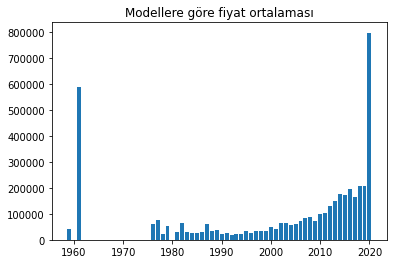

In [281]:
plt.bar(modelyil,ortalama)
plt.title("Modellere göre fiyat ortalaması")
plt.show()

**Markalara göre fiyatları inceliyorum**

In [229]:
markaavg=spark.sql("select marka, round(avg(fiyat)) as ortalama  from plot where group by marka order by marka asc")
markaavg.show()

+----------+--------+
|     marka|ortalama|
+----------+--------+
|     Acura|141513.0|
|Alfa Romeo|110962.0|
|      Audi|262828.0|
|       BMW|296008.0|
| Chevrolet|101177.0|
|  Chrysler| 94127.0|
|   Citroen| 80653.0|
|     Dacia| 93014.0|
|      Fiat| 69971.0|
|      Ford| 95538.0|
|     Geely| 43250.0|
|     Honda|109246.0|
|   Hyundai| 99612.0|
|  Infiniti|228390.0|
|     Isuzu|119789.0|
|    Jaguar|531438.0|
|      Jeep|198877.0|
|       Kia|118895.0|
|      Lada| 22144.0|
|Land Rover|598948.0|
+----------+--------+
only showing top 20 rows



In [230]:
marka = markaavg.toPandas()["marka"].values.tolist()
ortalama = markaavg.toPandas()["ortalama"].values.tolist()


Porsche markası en pahalı marka olarak gözükürken. En düşük fiyatlı araçlara sahip marka Tofaş olarak duruyor.

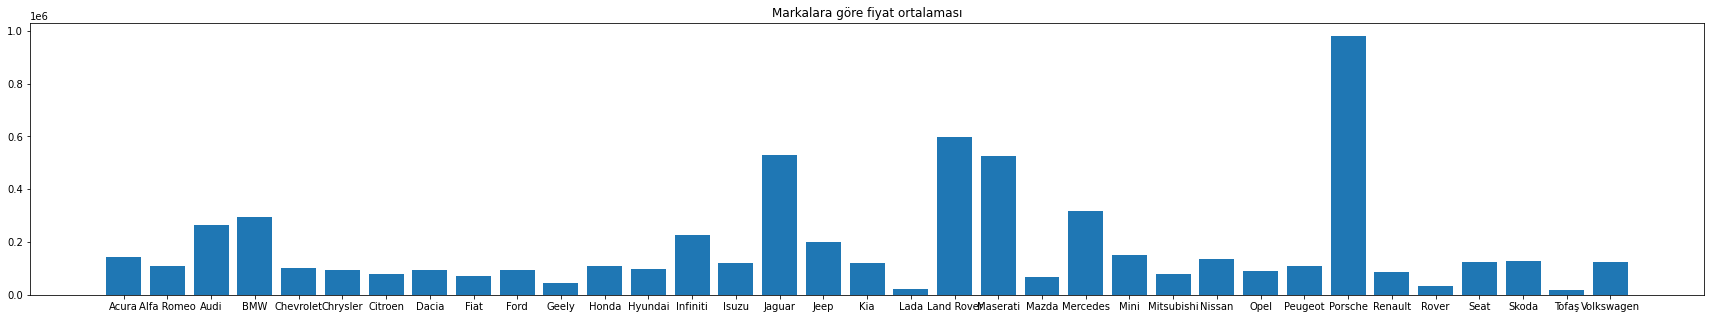

In [236]:
plt.figure(figsize=(30,5))
plt.bar(marka,ortalama)
plt.title("Markalara göre fiyat ortalaması")
plt.show()

**Yakıt Türüne Göre Fiyat Ortalamaları**

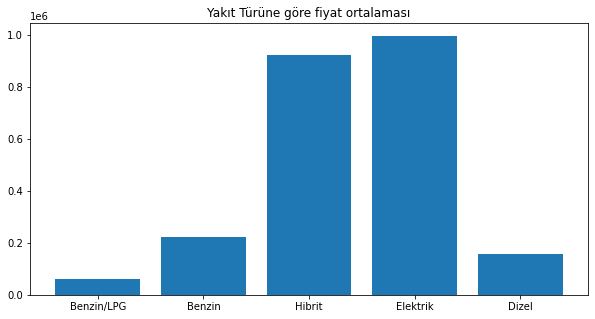

In [248]:
yakitavg=spark.sql("select yakitturu, round(avg(fiyat)) as ortalama  from plot where group by yakitturu")
yakit = yakitavg.toPandas()["yakitturu"].values.tolist()
ortalama = yakitavg.toPandas()["ortalama"].values.tolist()
plt.figure(figsize=(10,5))
plt.bar(yakit,ortalama)
plt.title("Yakıt Türüne göre fiyat ortalaması")
plt.show()

Hibrit ve Elektrikli araçlar değerli gözüküyorlar.

**Vites Türlerine Göre Fiyat Ortalamaları**

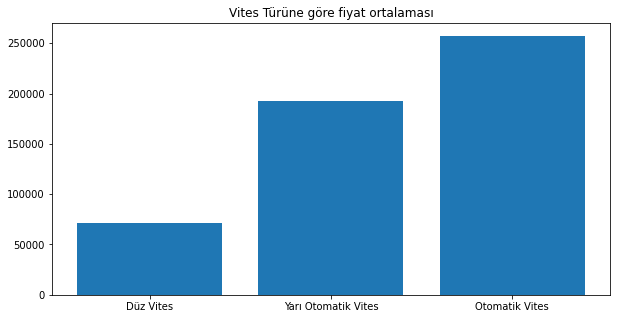

In [250]:
vitesavg=spark.sql("select vites, round(avg(fiyat)) as ortalama  from plot where group by vites")
vites = vitesavg.toPandas()["vites"].values.tolist()
ortalama = vitesavg.toPandas()["ortalama"].values.tolist()
plt.figure(figsize=(10,5))
plt.bar(vites,ortalama)
plt.title("Vites Türüne göre fiyat ortalaması")
plt.show()

In [ ]:
Otomatik Vites araçların fiyatı daha pahalı gözüküyor grafikte.

**Renklere Göre Fiyat Ortalaması**

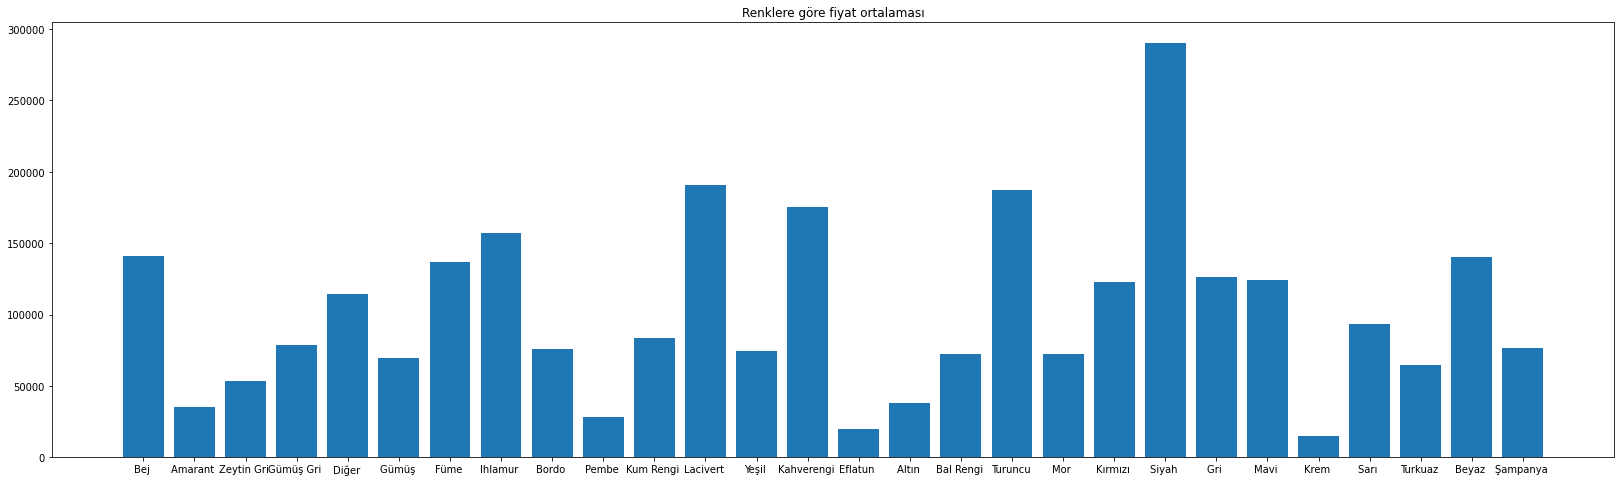

In [253]:
renkavg=spark.sql("select renk, round(avg(fiyat)) as ortalama  from plot where group by renk")
renk = renkavg.toPandas()["renk"].values.tolist()
ortalama = renkavg.toPandas()["ortalama"].values.tolist()
plt.figure(figsize=(28,8))
plt.bar(renk,ortalama)
plt.title("Renklere göre fiyat ortalaması")
plt.show()

Siyah araçların fiyatları açık ara farkla daha yüksek gözüküyor. Kırmızı olsun üç kuruş fazla olsun deyimi 2020 senesinde çok geçerli olduğunu söyleyemeyiz.

**Markalara Göre Verilen İlan Sayıları**

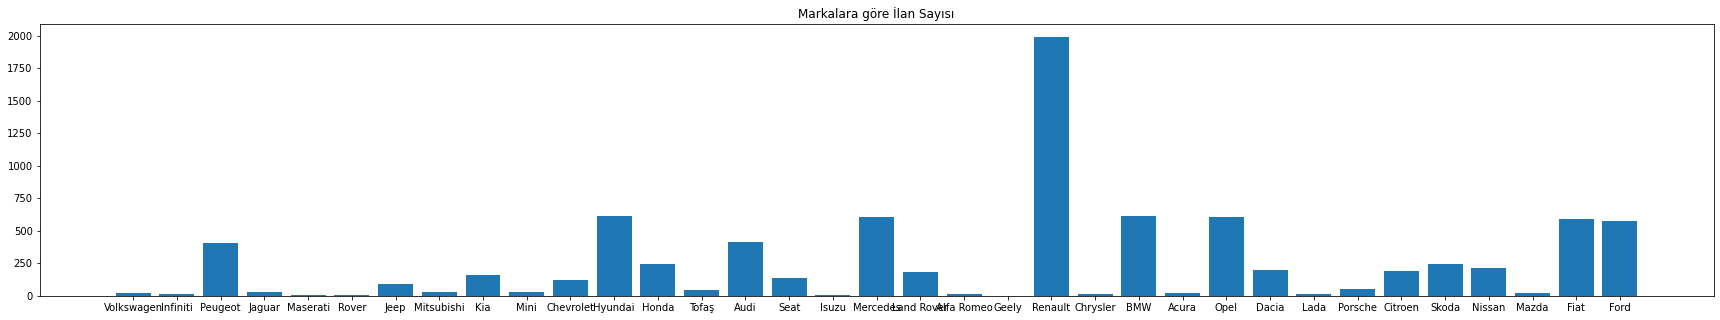

In [273]:
markacount=spark.sql("select marka, count(*) as sayi  from plot where  group by marka")
marka = markacount.toPandas()["marka"].values.tolist()
count = markacount.toPandas()["sayi"].values.tolist()
plt.figure(figsize=(30,5))
plt.bar(marka,count)
plt.title("Markalara göre İlan Sayısı")
plt.show()

Renault Markası çok çok açık farkla verilen ilan sayısında 2020 yılında oldukça önde.

**Satıcıya Göre Araç Sayıları**

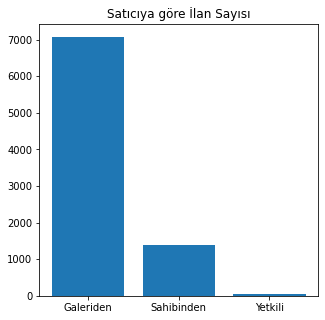

In [275]:
kimdencount=spark.sql("select kimden, count(*) as sayi  from plot where  group by kimden")
kimden = kimdencount.toPandas()["kimden"].values.tolist()
count = kimdencount.toPandas()["sayi"].values.tolist()
plt.figure(figsize=(5,5))
plt.bar(kimden,count)
plt.title("Satıcıya göre İlan Sayısı")
plt.show()